In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pydotplus
from IPython.display import Image  

In [112]:
df = pd.read_csv("train.csv",sep  = ",")
df_wanted= pd.read_csv("test.csv",sep = ",")

In [113]:
# numericaldataset.drop(["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"],axis = 1,inplace = True)

In [114]:
df1 = [c for i, c in enumerate(df.columns) if df.dtypes[i] in [np.int64]]
numericaldf1 = pd.DataFrame(df,columns = df1)

In [115]:
numericaldf1.drop(["Id","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"],axis = 1,inplace = True)

In [116]:
numericaldf1

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,856,854,0,1710,2,1,3,1,8,0,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,1262,0,0,1262,2,0,3,1,6,1,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,920,866,0,1786,2,1,3,1,6,1,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,961,756,0,1717,1,0,3,1,7,1,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,1145,1053,0,2198,2,1,4,1,9,1,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,694,0,1647,2,1,3,1,7,1,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,2073,0,0,2073,2,0,3,1,7,2,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,1188,1152,0,2340,2,0,4,1,9,2,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,1078,0,0,1078,1,0,2,1,5,0,366,0,112,0,0,0,0,4,2010,142125


In [117]:
X = numericaldf1.loc[:,"MSSubClass":"YrSold"]

In [118]:
y = numericaldf1.iloc[:,-1]

In [119]:
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1314, 25) (1314,)
(146, 25) (146,)


In [121]:
# Fit regression model
model = DecisionTreeRegressor(max_depth=3)
#play with max_depth
model = model.fit(X_train, y_train)
# Predict
train_predictions = model.predict(X_train) # train predict etmenın bi anlamı yok.
test_predictions = model.predict(X_test)

In [122]:
df_wanted1 = [c for i, c in enumerate(df_wanted.columns) if df_wanted.dtypes[i] in [np.int64]]

In [123]:
numericaldf_wanted = pd.DataFrame(df_wanted,columns = df_wanted1)

In [124]:
print(numericaldf_wanted)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0     1461          20    11622            5            6       1961   
1     1462          20    14267            6            6       1958   
2     1463          60    13830            5            5       1997   
3     1464          60     9978            6            6       1998   
4     1465         120     5005            8            5       1992   
...    ...         ...      ...          ...          ...        ...   
1454  2915         160     1936            4            7       1970   
1455  2916         160     1894            4            5       1970   
1456  2917          20    20000            5            7       1960   
1457  2918          85    10441            5            5       1992   
1458  2919          60     9627            7            5       1993   

      YearRemodAdd  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  \
0             1961       896         0             0      

In [125]:
X_wanted = numericaldf_wanted.loc[:,"MSSubClass":"YrSold"]

In [126]:
y_wanted = df_wanted.iloc[:,-1]

In [127]:
wanted_predictions = model.predict(X_wanted)

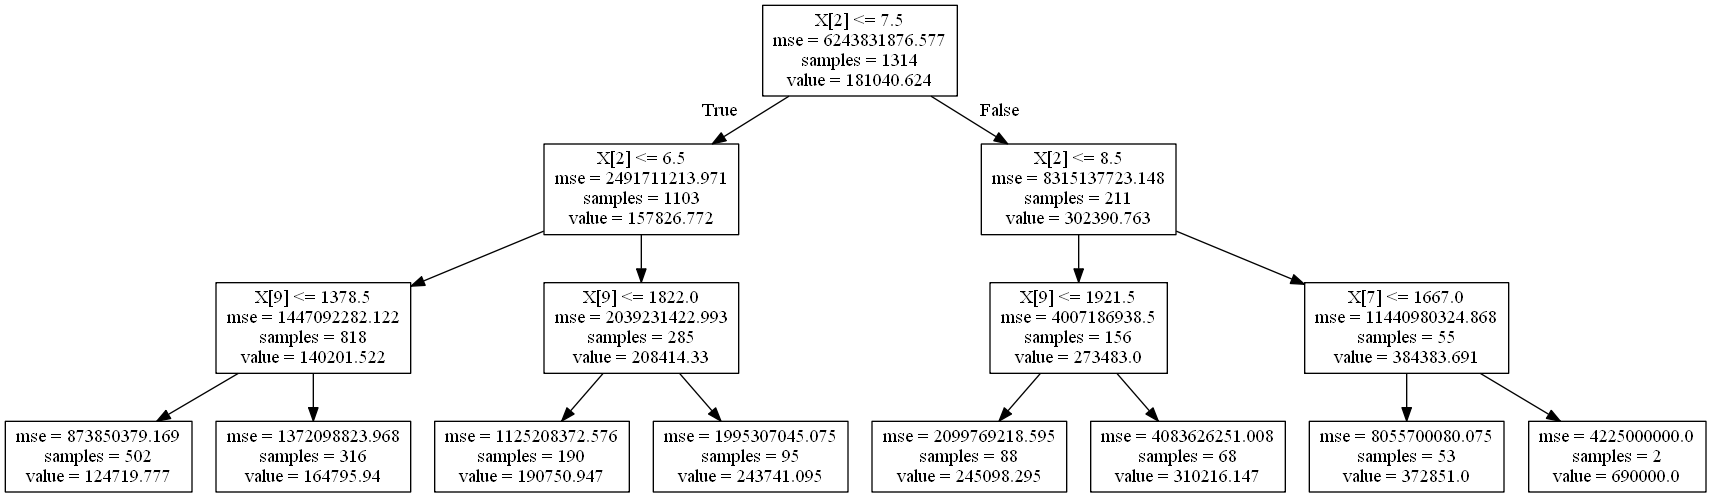

In [131]:
dot_data = tree.export_graphviz(model, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [133]:
cols = X.columns

In [134]:
print(cols)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [136]:
print(cols[2])
print(cols[7])
print(cols[9])

OverallQual
2ndFlrSF
GrLivArea


In [137]:
dataset4 = pd.DataFrame((df_wanted["Id"]))
dataset4["SalePrice"] = wanted_predictions

In [138]:
print(dataset4.to_string(index=False))

   Id      SalePrice
 1461  124719.776892
 1462  124719.776892
 1463  164795.939873
 1464  164795.939873
 1465  245098.295455
 1466  164795.939873
 1467  124719.776892
 1468  164795.939873
 1469  190750.947368
 1470  124719.776892
 1471  190750.947368
 1472  124719.776892
 1473  124719.776892
 1474  164795.939873
 1475  190750.947368
 1476  372851.000000
 1477  245098.295455
 1478  372851.000000
 1479  245098.295455
 1480  372851.000000
 1481  310216.147059
 1482  245098.295455
 1483  124719.776892
 1484  190750.947368
 1485  190750.947368
 1486  190750.947368
 1487  310216.147059
 1488  245098.295455
 1489  190750.947368
 1490  164795.939873
 1491  190750.947368
 1492  124719.776892
 1493  164795.939873
 1494  310216.147059
 1495  310216.147059
 1496  190750.947368
 1497  190750.947368
 1498  190750.947368
 1499  190750.947368
 1500  124719.776892
 1501  164795.939873
 1502  190750.947368
 1503  245098.295455
 1504  245098.295455
 1505  190750.947368
 1506  164795.939873
 1507  164795

In [139]:
dataset4.to_csv("Decisiontree.csv",index = False)